In [1]:
# Creating constants

# Colors for graphs

REQ_PALETTE = {
    "2015": "tab:red",
    "2023": "tab:purple"
}

# Order of exams

ORDER = [
        "2015 main",
        "2016 main",
        "2017 main",
        "2018 main",
        "2019 main",
        "2020 main",
        "2023 main",
        "2023 additional",
        "2024 main",
        "2024 additional",
        "2024 make-up"
]

In [2]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Creating functions for future analysis

# Creating two functions, that will be used later to aggregate DataFrames. There are 6 exams for 2015 core curriculum
# and 5 exams for 2023 core curriculum. To get an average, values corresponding to 2015 core curriculum needs to be
# divided by 6, and values corresponding to 2023 core curriculum - by 5.

def is_repetitive(df):
    comp_numb = [6 if year == "2015" else 5 for year in df["req_year"]]
    return df["req_count"].ge(comp_numb)

In [4]:
# Loading files

req_2015 = pd.read_csv("CSV/Req/req_2015.csv", 
                       index_col="id", 
                       dtype={"req_id": "str", "req_year": "str"}) # 2015 requirements
req_2023 = pd.read_csv("CSV/Req/req_2023.csv", 
                       index_col="id", 
                       dtype={"req_id": "str", "req_year": "str"}) # 2023 requirements
exams_2015 = pd.read_csv("CSV/Exams/old_exams.csv", 
                         index_col="id", 
                         dtype={"req_id": "str", "exc_numb": "str", "req_year": "str", "exam_year": "str"}) # 2015 exams data
exams_2023 = pd.read_csv("CSV/Exams/new_exams.csv", 
                         index_col="id", 
                         dtype={"req_id": "str", "exc_numb": "str", "req_year": "str", "exam_year": "str"}) # 2023 exams data
perc_2015 = pd.read_csv("CSV/Perc/old_perc.csv", 
                        index_col="id", 
                        dtype={"req_id": "str", "exc_numb": "str", "req_year": "str", "exam_year": "str"}) # percentages of completion for exams based on 2015 CC
perc_2023 = pd.read_csv("CSV/Perc/new_perc.csv", 
                        index_col="id", 
                        dtype={"req_id": "str", "exc_numb": "str", "req_year": "str", "exam_year": "str"})  # percentages of completion for exams based on 2023 CC

In [5]:
# Searching for null values in dataframes
for df in [req_2015, req_2023, exams_2015, exams_2023, perc_2015, perc_2023]:
    print(df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school_type  73 non-null     object
 1   req_id       73 non-null     object
 2   req_year     73 non-null     object
dtypes: object(3)
memory usage: 2.3+ KB
None 

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   req_year     74 non-null     object
 1   req_id       74 non-null     object
 2   school_type  74 non-null     object
dtypes: object(3)
memory usage: 2.3+ KB
None 

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   exc_numb     231 non-null    object 
 1   req_id       231 non-null    object 
 2   school_type  231 non-null    o

In [6]:
# Changing id columns to be named "id"

for data in [perc_2015, perc_2023]:
    data.index.rename("id", inplace=True)

# Dropping redundant column and adding important column to 2023 requirements 
req_2023["school_type"] = "high"

# Changing task number 13 to 13.1 for 2023 dataframes

for data in [req_2023, exams_2023, perc_2023]:
    data["req_id"] = data["req_id"].str.replace(r"^13$", "13.1", regex=True).str.replace(r"^13.0$", "13.1", regex=True)
    try:
        data["exc_numb"] = data["exc_numb"].str.replace(r"\.0$", "", regex=True)
    except KeyError:
        pass
    

In [7]:
# Concatenating requirements and exams for later analysis

exams = pd.concat([exams_2015, exams_2023], ignore_index=True)
req = pd.concat([req_2015, req_2023], ignore_index=True)
all_perc = pd.concat([perc_2015, perc_2023])

all_perc.drop(columns=["req_id", "school_type"], inplace=True)
all_perc = all_perc.drop_duplicates()

In [8]:
# Checking sum of points for all exams (.99 and .98 floats are the result of splitting task points and rounding, for example 1 point splitted into 3 requirements gave 0.33 points for each requirement)

exams.groupby(["req_year", "exam_year", "exam_type"])["points"].sum()

req_year  exam_year  exam_type 
2015      2015       main          50.00
          2016       main          50.00
          2017       main          50.00
          2018       main          50.01
          2019       main          49.99
          2020       main          49.99
2023      2023       additional    46.00
                     main          45.99
          2024       additional    45.99
                     main          46.00
                     make-up       45.98
Name: points, dtype: float64

In [9]:
# Searching for null values in dataframes
for df in [exams, req, all_perc]:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   exc_numb     433 non-null    object 
 1   req_id       433 non-null    object 
 2   school_type  433 non-null    object 
 3   points       433 non-null    float64
 4   req_year     433 non-null    object 
 5   exam_year    433 non-null    object 
 6   exam_type    433 non-null    object 
dtypes: float64(1), object(6)
memory usage: 23.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school_type  147 non-null    object
 1   req_id       147 non-null    object
 2   req_year     147 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 0 to 74
Data columns (total 5 columns):
 #   Col

In [10]:
# Adding a column "appeared" to the exams DataFrame and setting its value to True

exams["appeared"] = True

In [11]:
# Merging req and exams DataFrames on "req_id", "school_type", and "req_year" to indicate in req DF all requirements that
# appeared on the Matura exam at least once

req = req.merge(exams[["req_id", "school_type", "req_year", "appeared"]].drop_duplicates(subset=["req_id", "school_type", "req_year"]),
                on=["req_id", "school_type", "req_year"],
                how="left").fillna(False)

# Dropping appeared column as it is now redundant in the exams dataframe 

exams.drop(columns=["appeared"], inplace=True)

In [12]:
req.head()

,school_type,req_id,req_year,appeared
0,high,1.1,2015,False
1,high,1.2,2015,False
2,high,1.3,2015,True
3,high,1.4,2015,True
4,high,1.5,2015,True


In [13]:
req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school_type  147 non-null    object
 1   req_id       147 non-null    object
 2   req_year     147 non-null    object
 3   appeared     147 non-null    bool  
dtypes: bool(1), object(3)
memory usage: 3.7+ KB


In [14]:
# Summing all points for exc_numb in dataframes to get how much points overall a task is worth

exams = exams.merge(exams.groupby(["req_year", "exam_year", "exam_type", "exc_numb"])["points"].sum().reset_index(name="exc_pts"),
                    on=["req_year", "exam_year", "exam_type", "exc_numb"],
                    how="left"
)

In [15]:
# Rounding exc_points to the nearest integer

exams["exc_pts"] = round(exams["exc_pts"])

In [16]:
exams.head()

,exc_numb,req_id,school_type,points,req_year,exam_year,exam_type,exc_pts
0,1,1.8,high,1.0,2015,2015,main,1.0
1,2,1.6,high,1.0,2015,2015,main,1.0
2,3,1.9,high,1.0,2015,2015,main,1.0
3,4,2.1,high,1.0,2015,2015,main,1.0
4,5,3.2,high,1.0,2015,2015,main,1.0


In [17]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   exc_numb     433 non-null    object 
 1   req_id       433 non-null    object 
 2   school_type  433 non-null    object 
 3   points       433 non-null    float64
 4   req_year     433 non-null    object 
 5   exam_year    433 non-null    object 
 6   exam_type    433 non-null    object 
 7   exc_pts      433 non-null    float64
dtypes: float64(2), object(6)
memory usage: 27.2+ KB


In [18]:
# Calculating average points a tasks based on specific requirement is worth

req = req.merge(exams.groupby(["req_year", "req_id", "school_type"])["points"]
                                                .sum()
                                                .reset_index(name="req_sum_pts"),
                on=["req_year", "req_id", "school_type"],
                how="left"
               )

req["req_avg_pts"] = [sum_pts / 6 if year == "2015" else sum_pts / 5 for year, sum_pts in zip(req["req_year"], req["req_sum_pts"])]

In [19]:
# Calculating average percentage of exam's total points a requirement is worth

req["req_avg_perc"] = [(avg_points / 50) * 100 if year == "2015" else (avg_points / 46) * 100 for year, avg_points in zip(req["req_year"], req["req_avg_pts"])]

# Dropping column with sum of all points

req.drop(columns=["req_sum_pts"], inplace=True)

In [20]:
# Checking if avg exam's points is equal to 50 and 46 for req year 2015 and 2023 respectively, and if sum of percentages is equal to 100

req.groupby("req_year").agg({"req_avg_pts": "sum", "req_avg_perc": "sum"})

,req_avg_pts,req_avg_perc
req_year,,
2015,49.998333,99.996667
2023,45.992000,99.982609


In [21]:
# Changing NaN values in avg_pts and avg_perc columns to 0

req[["req_avg_pts", "req_avg_perc"]] = req[["req_avg_pts", "req_avg_perc"]].fillna(0)

In [22]:
# Creating points range categories

exams["cat"] = ["1" if pts == 1 else "2" if pts == 2 else "3+" for pts in exams["exc_pts"]]

In [23]:
# Sum of all points for each category by CC year

points_cat = (exams.drop_duplicates(subset=["req_year", "exc_numb", "exam_year", "exam_type"])
                                         .groupby(["req_year", "cat"])["exc_pts"].sum()
                                         .reset_index(name="pt_cat")
             )

In [24]:
# Getting an average % of points on the exams (one point on 2015 exam is worth 2% and there were 6 exams, so *2 and 1/6 is 1/3
# and one point on 2023 CC exam is worth 2.174% and there were 5 exams, so *2.174 and 1/5 is 1/2.3)

points_cat["perc_cat"] = [round(points, 0) for points in
                          [points / 3 if year == "2015" else points / 2.3 for points, year in zip(points_cat["pt_cat"], points_cat["req_year"])]
                         ]

In [25]:
points_cat.head()

,req_year,cat,pt_cat,perc_cat
0,2015,1,150.0,50.0
1,2015,2,72.0,24.0
2,2015,3+,78.0,26.0
3,2023,1,136.0,59.0
4,2023,2,56.0,24.0


In [26]:
# Calculating number of appearences on Matura exam of each requirement (appearing more than once on the exam doesn't count)

exams_req_count = exams[["req_year", "exam_year", "exam_type", "req_id", "school_type"]].drop_duplicates()
exams_req_count = exams_req_count.groupby(["req_year", "req_id", "school_type"])["req_id"].count().reset_index(name="req_count")

In [27]:
# Adding calculated number of appearences to the req dataframe

req = req.merge(exams_req_count, on=["req_year", "req_id", "school_type"], how="left")
req["req_count"] = req["req_count"].fillna(0)

In [28]:
# Marking requirements as repetitive or not depending on the number of exams on which requirement appeared

req["repetitive"] = [True if (year == "2015" and req_count == 6) or (year == "2023" and req_count == 5) else False for year, req_count in zip(req["req_year"], req["req_count"])]

In [29]:
# Create a column to find requirements that appeared on the Matura exam, but are not repetitive

req["app_no_rep"] = [(appeared and not(repetitive)) for appeared, repetitive in zip(req["appeared"], req["repetitive"])]

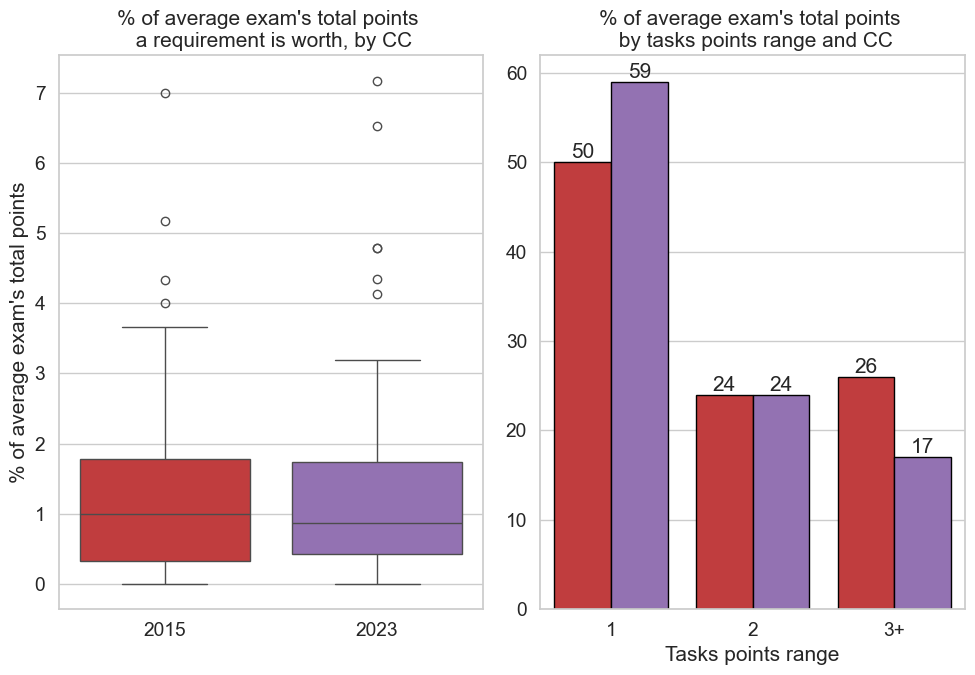

In [30]:
# Setting up graph style and context

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)

# Creating figure and axes objects in matplotlib.plt

f, ax = plt.subplots(1, 2, figsize=(10,7))

# Plotting the first chart - box plot of distribution an average points (in % of exam's total points) a requirements are worth

sns.boxplot(data=req, x="req_year", y="req_avg_perc", hue="req_year", palette=REQ_PALETTE, ax=ax[0])
ax[0].set(xlabel="", ylabel="% of average exam's total points")
ax[0].set(title="% of average exam's total points \n a requirement is worth, by CC")

# Plotting the second chart - bar plot of distribution of requirements depending on the points range a requirement is worth on the average exam

sns.barplot(data=points_cat, x="cat", y="perc_cat", hue="req_year", palette=REQ_PALETTE, edgecolor="black", ax=ax[1], legend=False)
ax[1].set(xlabel="Tasks points range", ylabel="")
for i in ax[1].containers:
    ax[1].bar_label(i, )

# Setting up title, labels, ticks, and legend

ax[1].set(title="% of average exam's total points \n by tasks points range and CC")
plt.tick_params(left = False)

plt.tight_layout()

# Plotting the graph

plt.show()

In [31]:
# Calculating 

req_app_perc = pd.DataFrame({
    "req_year": ["2015 CC", "2023 CC"],
    "app_no_rep": [round(req[req["req_year"] == r_year]["app_no_rep"].mean(), 2) * 100 for r_year in ["2015", "2023"]],
    "repetitive": [round(req[req["req_year"] == r_year]["repetitive"].mean(), 2) * 100 for r_year in ["2015", "2023"]],
    "not_appeared": [round(1 - req[req["req_year"] == r_year]["appeared"].mean(), 2) * 100 for r_year in ["2015", "2023"]]
})

In [32]:
# Setting up Seaborn style for the next chart

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

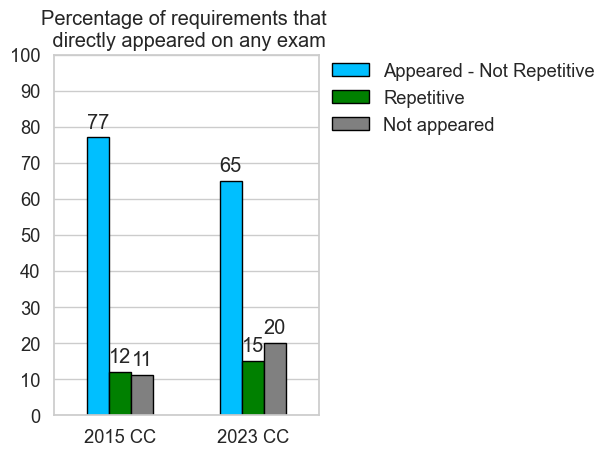

In [33]:
# Creating stacked bar plots for the data

g = req_app_perc.set_index("req_year").plot(kind="bar", legend=False, edgecolor="black", color=["deepskyblue", "green", "grey"])

# Setting up labels, and ticks

g.set_xlabel("")
g.set_title("Percentage of requirements that \n directly appeared on any exam")
g.set_yticks(range(0, 110, 10))
g.grid(axis = "x")
plt.xticks(rotation=0)

for i in g.containers:
    g.bar_label(i, fmt="%.0f", padding=4)

# Setting up legend

labels_legend = ["Appeared - Not Repetitive", "Repetitive", "Not appeared"]
g.legend(labels=labels_legend, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., frameon=False)

# Plotting the chart

plt.tight_layout()
plt.show()

In [34]:
# Creating tasks dataframe, where the task number data is grouped. If task is based on couple requirements, it is consider as repetitive only if all of the requirements are repetitive

tasks = exams.merge(req[["req_id", "school_type", "req_year", "repetitive"]], on=["req_id", "school_type", "req_year"], how="left")
tasks = tasks.groupby(["req_year", "exam_year", "exam_type", "exc_numb", "cat"])["repetitive"].min().reset_index(name="repetitive")

In [35]:
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   req_year    379 non-null    object
 1   exam_year   379 non-null    object
 2   exam_type   379 non-null    object
 3   exc_numb    379 non-null    object
 4   cat         379 non-null    object
 5   repetitive  379 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 15.3+ KB


In [36]:
# Merging exams and percentages of completion to fix additional and make-up exams based on 2023 requirements

exams = exams.merge(all_perc, on=["req_year", "exam_year", "exam_type", "exc_numb"], how="left")

In [37]:
exams

,exc_numb,req_id,school_type,points,req_year,exam_year,exam_type,exc_pts,cat,perc
0,1,1.8,high,1.0,2015,2015,main,1.0,1,0.78
1,2,1.6,high,1.0,2015,2015,main,1.0,1,0.83
2,3,1.9,high,1.0,2015,2015,main,1.0,1,0.49
3,4,2.1,high,1.0,2015,2015,main,1.0,1,0.80
4,5,3.2,high,1.0,2015,2015,main,1.0,1,0.54
...,...,...,...,...,...,...,...,...,...,...
428,26,8.11,high,0.5,2023,2024,make-up,1.0,1,NaN
429,27,11.1,high,1.0,2023,2024,make-up,1.0,1,NaN
430,28,12.2,high,1.0,2023,2024,make-up,1.0,1,NaN
431,29,12.1,high,2.0,2023,2024,make-up,2.0,2,NaN


In [38]:
exams[np.isnan(exams["perc"])]

,exc_numb,req_id,school_type,points,req_year,exam_year,exam_type,exc_pts,cat,perc
268,1,1.7,high,1.0,2023,2023,additional,1.0,1,NaN
269,2,1.4,high,1.0,2023,2023,additional,1.0,1,NaN
270,3,1.2,high,2.0,2023,2023,additional,2.0,2,NaN
271,4,1.8,high,1.0,2023,2023,additional,1.0,1,NaN
272,5,1.9,high,1.0,2023,2023,additional,1.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
428,26,8.11,high,0.5,2023,2024,make-up,1.0,1,NaN
429,27,11.1,high,1.0,2023,2024,make-up,1.0,1,NaN
430,28,12.2,high,1.0,2023,2024,make-up,1.0,1,NaN
431,29,12.1,high,2.0,2023,2024,make-up,2.0,2,NaN


In [39]:
# Create dataframe of requirements that have no percentage of completion

exams_null = exams[np.isnan(exams["perc"])].copy()
exams_null.drop(columns=["perc"], inplace=True)

In [40]:
# Creating average percentage of completions based on tasks requirements and points category

exams_perc_req_cat = exams[~np.isnan(exams["perc"])].groupby(["req_year", "req_id", "school_type", "cat"])["perc"].mean().reset_index(name="perc")

In [41]:
# Filling exams_null dataframe with percentages of completion for tasks with matching requirements and points category

exams_null = exams_null.merge(exams_perc_req_cat, on=["req_year", "req_id", "school_type", "cat"], how="left")

In [42]:
# Splitting exams_null dataframe into two dataframes: one with tasks still not having percentages of completion and one that have percentages of completion after first fixing

exams_fixed_1, exams_null = [x for _, x in exams_null.groupby(np.isnan(exams_null["perc"]))]

In [43]:
exams_fixed_1

,exc_numb,req_id,school_type,points,req_year,exam_year,exam_type,exc_pts,cat,perc
0,1,1.7,high,1.0,2023,2023,additional,1.0,1,0.780
1,2,1.4,high,1.0,2023,2023,additional,1.0,1,0.795
2,3,1.2,high,2.0,2023,2023,additional,2.0,2,0.495
5,6,2.1,high,1.0,2023,2023,additional,1.0,1,0.770
8,9,3.5,high,3.0,2023,2023,additional,3.0,3+,0.780
...,...,...,...,...,...,...,...,...,...,...
122,26,8.11,high,0.5,2023,2024,make-up,1.0,1,0.770
123,27,11.1,high,1.0,2023,2024,make-up,1.0,1,0.845
124,28,12.2,high,1.0,2023,2024,make-up,1.0,1,0.760
125,29,12.1,high,2.0,2023,2024,make-up,2.0,2,0.665


In [44]:
# Creating average percentage of completions based only on tasks requirements

exams_perc_req = exams[~np.isnan(exams["perc"])].groupby(["req_year", "req_id", "school_type"])["perc"].mean().reset_index(name="perc")

In [45]:
# Filling new exams_null dataframe with percentages of completion for tasks with matching requirements

exams_null.drop(columns=["perc"], inplace=True)
exams_null = exams_null.merge(exams_perc_req, on=["req_year", "req_id", "school_type"], how="left")

In [46]:
# Splitting exams_null dataframe into two dataframes: one with tasks still not having percentages of completion and one that have percentages of completion after second fixing

exams_fixed_2, exams_null = [x for _, x in exams_null.groupby(np.isnan(exams_null["perc"]))]

In [47]:
exams_fixed_2

,exc_numb,req_id,school_type,points,req_year,exam_year,exam_type,exc_pts,cat,perc
4,13.1,5.4,high,2.00,2023,2023,additional,2.0,2,0.755
8,17,6.4,high,1.00,2023,2023,additional,1.0,1,0.440
13,27,9.3,high,1.00,2023,2023,additional,1.0,1,0.410
18,11.2,5.12,high,0.50,2023,2024,additional,1.0,1,0.550
19,14,5.9,high,2.00,2023,2024,additional,2.0,2,0.790
23,17,6.4,high,1.00,2023,2024,additional,1.0,1,0.440
26,24,9.1,high,1.33,2023,2024,additional,4.0,3+,0.750
27,24,9.2,high,1.33,2023,2024,additional,4.0,3+,0.705
28,24,9.3,high,1.33,2023,2024,additional,4.0,3+,0.410
29,30,12.1,high,1.00,2023,2024,additional,1.0,1,0.665


In [48]:
# Filling exams dataframes with calculated percentages of completion

exams = exams.merge(exams_fixed_1[["req_year", "exam_year", "exam_type", "exc_numb", "cat", "perc"]], on=["req_year", "exam_year", "exam_type", "exc_numb", "cat"], how="left")
exams = exams.merge(exams_fixed_2[["req_year", "exam_year", "exam_type", "exc_numb", "perc"]], on=["req_year", "exam_year", "exam_type", "exc_numb"], how="left")

In [49]:
exams

,exc_numb,req_id,school_type,points,req_year,exam_year,exam_type,exc_pts,cat,perc_x,perc_y,perc
0,1,1.8,high,1.0,2015,2015,main,1.0,1,0.78,NaN,NaN
1,2,1.6,high,1.0,2015,2015,main,1.0,1,0.83,NaN,NaN
2,3,1.9,high,1.0,2015,2015,main,1.0,1,0.49,NaN,NaN
3,4,2.1,high,1.0,2015,2015,main,1.0,1,0.80,NaN,NaN
4,5,3.2,high,1.0,2015,2015,main,1.0,1,0.54,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
452,26,8.11,high,0.5,2023,2024,make-up,1.0,1,NaN,0.770,NaN
453,27,11.1,high,1.0,2023,2024,make-up,1.0,1,NaN,0.845,NaN
454,28,12.2,high,1.0,2023,2024,make-up,1.0,1,NaN,0.760,NaN
455,29,12.1,high,2.0,2023,2024,make-up,2.0,2,NaN,0.665,NaN


In [50]:
# Changing NaN values to 0

exams[["perc", "perc_y", "perc_x"]] = exams[["perc", "perc_y", "perc_x"]].fillna(0)

In [51]:
# Adding percentages of completion columns to get one (every row have percentage of completion in only one of these columns, so its ok to add them up)

exams["perc"] = exams["perc_x"] + exams["perc_y"] + exams["perc"]
exams.drop(columns=["perc_x", "perc_y"], inplace=True)

In [52]:
# Grouping exams and calculating mean percentage of completion for every task. This is necessary in case some tasks are based on couple requirements

exams_tasks = exams.groupby(["req_year", "exam_year", "exam_type", "exc_numb"]).agg({"exc_pts": "mean", "perc": "mean"}).reset_index()

In [53]:
# Merging tasks and exams_tasks and leaving only columns needed for future analysis

tasks = tasks[["req_year", "exam_year", "exam_type", "exc_numb", "repetitive", "cat"]].merge(exams_tasks, on=["req_year", "exam_year", "exam_type", "exc_numb"], how="left")

In [54]:
# Looking at tasks with percentage of completion still equal to 0. If there is no tasks based on repetitive requirements, we are good to go, because expected scores will be calculated only for such tasks

tasks[tasks["perc"] == 0]

,req_year,exam_year,exam_type,exc_numb,repetitive,cat,exc_pts,perc
210,2023,2023,additional,14,False,1,1.0,0.0
211,2023,2023,additional,15.1,False,1,1.0,0.0
212,2023,2023,additional,15.2,False,1,1.0,0.0
215,2023,2023,additional,18,False,1,1.0,0.0
218,2023,2023,additional,20,False,2,2.0,0.0
219,2023,2023,additional,21,False,1,1.0,0.0
222,2023,2023,additional,24,False,1,1.0,0.0
234,2023,2023,additional,4,False,1,1.0,0.0
235,2023,2023,additional,5,False,1,1.0,0.0
237,2023,2023,additional,7,False,1,1.0,0.0


In [55]:
# Calculating tasks expected points

tasks["exc_exp_pts"] = tasks["exc_pts"] * tasks["perc"]

In [56]:
# Calculating sum of points and expected points of tasks based on repetitive requirements for each exam

rep_scores = tasks[tasks["repetitive"] == True].groupby(["req_year", "exam_year", "exam_type"]).agg({"exc_pts": "sum", "exc_exp_pts": "sum"}).reset_index()

In [57]:
rep_scores

,req_year,exam_year,exam_type,exc_pts,exc_exp_pts
0,2015,2015,main,14.0,8.84
1,2015,2016,main,15.0,8.39
2,2015,2017,main,13.0,8.85
3,2015,2018,main,15.0,10.92
4,2015,2019,main,16.0,11.14
5,2015,2020,main,12.0,8.09
6,2023,2023,additional,22.0,13.47
7,2023,2023,main,23.0,14.69
8,2023,2024,additional,17.0,10.88
9,2023,2024,main,19.0,10.73


In [58]:
# Turning points and expected points into max and expected scores

rep_scores["exc_pts"] = [round((points / 50) * 100, 0) if year == "2015" else round((points / 46) * 100, 0) for year, points in zip(rep_scores["req_year"], rep_scores["exc_pts"])]
rep_scores["exc_exp_pts"] = [round((points / 50) * 100, 0) if year == "2015" else round((points / 46) * 100, 0) for year, points in zip(rep_scores["req_year"], rep_scores["exc_exp_pts"])]
rep_scores.rename(columns={"exc_pts": "max_score", "exc_exp_pts": "exp_score"}, inplace=True)

In [59]:
# Creating "exam" column to distinguish every exam

rep_scores["exam"] = rep_scores["exam_year"] + " " + rep_scores["exam_type"]

In [60]:
# Calculating differences between max and expected scores for each exam

rep_scores["score_diff"] = rep_scores["max_score"] - rep_scores["exp_score"]

In [61]:
rep_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   req_year    11 non-null     object 
 1   exam_year   11 non-null     object 
 2   exam_type   11 non-null     object 
 3   max_score   11 non-null     float64
 4   exp_score   11 non-null     float64
 5   exam        11 non-null     object 
 6   score_diff  11 non-null     float64
dtypes: float64(3), object(4)
memory usage: 748.0+ bytes


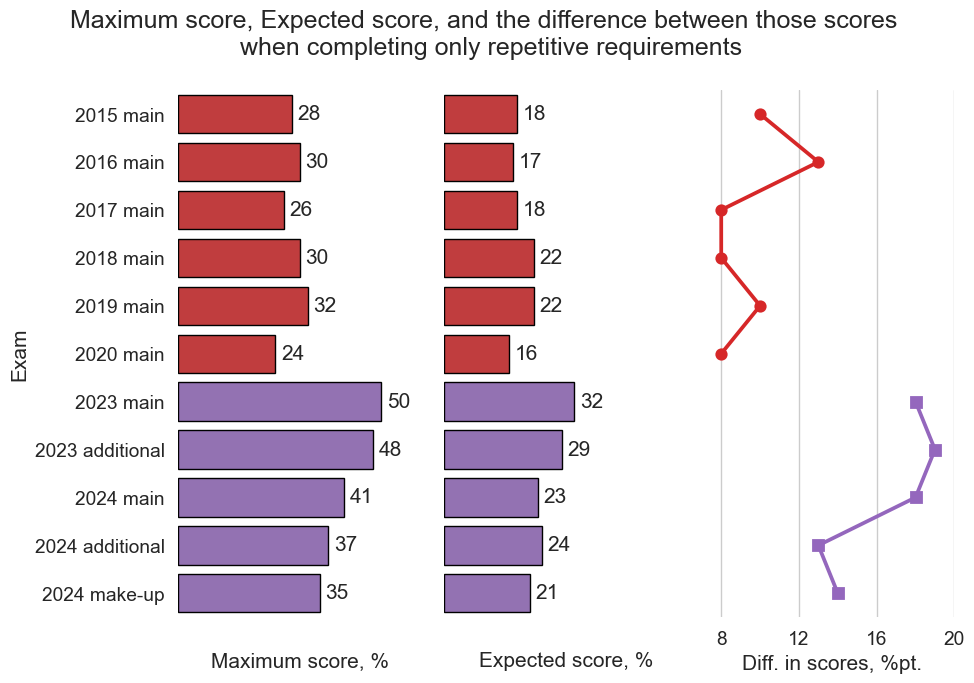

In [62]:
# Setting up style and context

sns.set_style("white")
sns.set_context("notebook", font_scale=1.25)

# Creating figure and axes objects in matplotlib.plt

f, ax = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(10,7), gridspec_kw={'width_ratios': [1, 1, 1]})

# Plotting 3 graphs: max score, expected score, and difference in scores for every exam

sns.barplot(data=rep_scores, x="max_score", y="exam", hue="req_year", order=ORDER, palette=REQ_PALETTE, legend=False, edgecolor="black", ax=ax[0])
ax[0].set(xlabel="Maximum score, %", ylabel="Exam")
ax[0].set(xticks=range(0, 70, 10))
ax[0].set_xticklabels([])
ax[0].xaxis.labelpad = 15

for i in ax[0].containers:
    ax[0].bar_label(i, fmt="%.0f", padding=4)

sns.barplot(data=rep_scores, x="exp_score", y="exam", hue="req_year", order=ORDER, palette=REQ_PALETTE, legend=False, edgecolor="black", ax=ax[1])
ax[1].set(xlabel="Expected score, %", ylabel="")
ax[1].set(xticks=range(0, 70, 10))
ax[1].set_xticklabels([])
ax[1].xaxis.labelpad = 15

for i in ax[1].containers:
    ax[1].bar_label(i, fmt="%.0f", padding=4)

sns.pointplot(data=rep_scores, x="score_diff", y="exam", hue="req_year", palette=REQ_PALETTE, markers=["o", "s"], ax=ax[2], legend=False)
ax[2].set(xlabel="Diff. in scores, %pt.", ylabel="")
ax[2].set(xticks=range(8, 24, 4))

sns.despine(bottom = True, left = True)
plt.tick_params(bottom = False)
plt.suptitle("Maximum score, Expected score, and the difference between those scores \n when completing only repetitive requirements")

ax[2].grid(axis = "x")
plt.tight_layout()
plt.show()


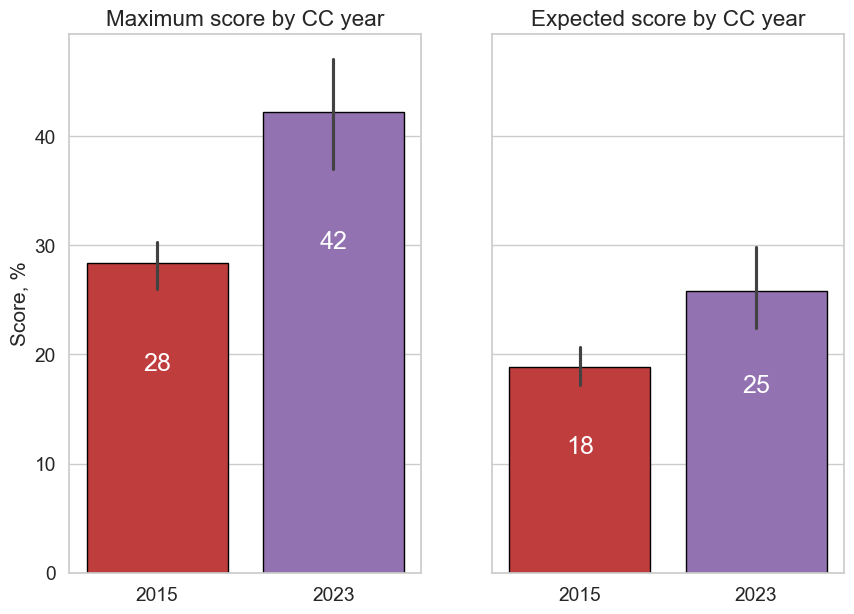

In [63]:
 # Plotting 2 graphs: mean maximum and expected score by core curriculum

sns.set_style("whitegrid")

f, ax = plt.subplots(1, 2, sharey=True, figsize=(10,7))

sns.set_context("notebook", font_scale=1.35)

sns.barplot(data=rep_scores, x="req_year", y="max_score", hue="req_year", palette=REQ_PALETTE, edgecolor="black", ax=ax[0], legend=False)
for p in ax[0].patches:
    ax[0].annotate(f'\n{int(p.get_height())}', (p.get_x() + 0.4, p.get_height() - 0.2 * p.get_height()), ha='center', va='top', color='white', size=18)

ax[0].set(xlabel="",
       ylabel="Score, %",
          title="Maximum score by CC year")


sns.barplot(data=rep_scores, x="req_year", y="exp_score", hue="req_year", palette=REQ_PALETTE, edgecolor="black", ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(f'\n{int(p.get_height())}', (p.get_x() + 0.4, p.get_height() - 0.2 * p.get_height()), ha='center', va='top', color='white', size=18)

ax[1].set(xlabel="",
       ylabel="Expected score, %",
          title="Expected score by CC year")

plt.show()